In [379]:
from sklearn import svm
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
import numpy as np


In [336]:
X, Y = datasets.make_classification(n_samples = 30, n_classes=2,
                                    hypercube=1, class_sep=2.0)

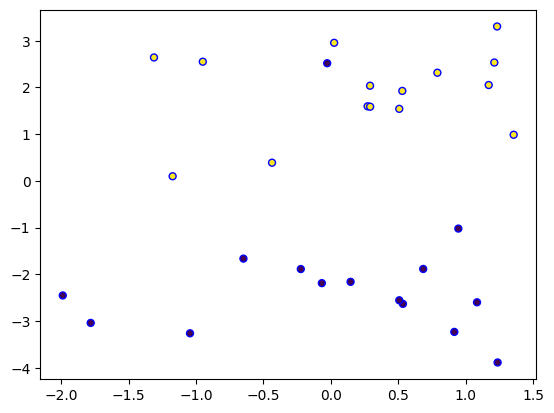

In [337]:
plt.scatter(X[:, 0], X[:, 1], marker="o", c=Y, s=25, edgecolor="b")

In [358]:
X[:, 1]

array([ 2.53310509,  2.05143511,  1.59646958,  2.95459366, -2.18758534,
        2.51759719,  1.92516036,  0.38936216, -2.15938252, -3.03842874,
       -2.59781887,  2.6413821 ,  1.5418187 , -1.0202057 ,  2.03663986,
        1.5875426 ,  2.31448108,  3.30410904,  0.98733691, -1.88431511,
       -1.88623518,  2.55034458, -2.45121954, -1.66292714, -3.23116746,
       -3.26065412,  0.09944326, -3.88523801, -2.63124249, -2.55447483])

In [374]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [375]:
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [376]:
y_pred = model.predict(X_test)

In [377]:
support_vectors = model.support_vectors_

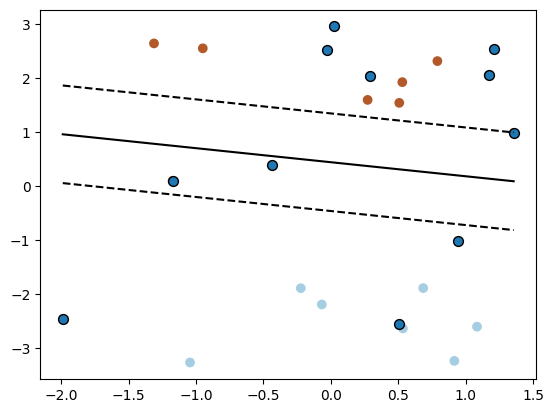

In [389]:
#Hyperplane
w = model.coef_[0]
b = model.intercept_[0]
slope = -w[0] / w[1]
xx = np.linspace(min(X_train[:, 0]), max(X_train[:, 0]))
yy = slope * xx - (b / w[1])

#Margin
margin = 1 / np.sqrt(np.sum(w ** 2))

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s= 50, edgecolors='k') #Support Vector

plt.plot(xx, yy, 'k-')

plt.plot(xx, yy + margin, 'k--')
plt.plot(xx, yy - margin, 'k--')
